# Unidad 1 – Fases 1 a 3 (CRISP-DM)

### Proyecto: Prediccion de combustible con redes Neuronales


-Business Understanding → Data Understanding → Data Preparation
-  **Integrantes:**
-  David Guerra Ordoñez
-  Richard Yanqui Inocente
-  Javier Tello Rivas


## Fase 1. Business Understanding

### 🎯 1. Objective

Construir un modelo de redes neuronales que prediga las ventas de combustible en el perú con Data libre del PERÚ abstraida de OSINERGIM

#### Success criteria (SC)


- **Técnico:** F1-score ≥ 0.80 en validación.  
- **De negocio:** contribuir al monitoreo sistemático de los vehículos no aptos en circulación y generar evidencia que permita a la Municipalidad de San Isidro diseñar estrategias orientadas a reducir progresivamente su número.


## Fase 2. Data Understanding

### 📥 2. Data collection 

In [20]:
import pandas as pd
import numpy as nP

df = pd.read_excel("Diecismuenvemil.xlsx")


In [22]:
# Resumen general
df.info()
print('df.columns:',df.columns)
print('df.shape:',df.shape)
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19709 entries, 0 to 19708
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fecha_emision            19709 non-null  int64  
 1   fecha_corte              19709 non-null  int64  
 2   id                       19709 non-null  int64  
 3   producto                 19709 non-null  object 
 4   fe_inventario            19709 non-null  object 
 5   cantidad_mb              19709 non-null  float64
 6   fe_proceso               19709 non-null  object 
 7   cantidad_mb_lim          19709 non-null  float64
 8   vlmen_fndo_ttal          19709 non-null  float64
 9   ANON_CO_OSINERG          19709 non-null  object 
 10  ANON_PTA_ABASTECIMIENTO  19709 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 1.7+ MB
df.columns: Index(['fecha_emision', 'fecha_corte', 'id', 'producto', 'fe_inventario',
       'cantidad_mb', 'fe_proceso', 'cant

,fecha_emision,fecha_corte,id,producto,fe_inventario,cantidad_mb,fe_proceso,cantidad_mb_lim,vlmen_fndo_ttal,ANON_CO_OSINERG,ANON_PTA_ABASTECIMIENTO
0,20250701,20250701,1,G Premium,2025-01-12 00:00:00,35.98500,2025-01-19 12:10:02,35.98500,0.03300,3dcd3239e2,83ae64708f
1,20250701,20250701,2,G Premium,2025-01-09 00:00:00,0.00000,2025-01-16 12:10:02,0.00000,0.00000,2127ae39c1,fdb7133ee2
2,20250701,20250701,3,G Premium,2025-01-22 00:00:00,0.32607,2025-01-29 12:10:02,0.32607,0.00029,6ef1e6909e,9fc7ed4647
3,20250701,20250701,4,G Premium,2025-02-02 00:00:00,16.21480,2025-02-09 12:10:02,16.21480,2.61570,98feeeb363,335ac645f3
4,20250701,20250701,5,G Premium,2025-01-05 00:00:00,0.00000,2025-01-12 12:10:01,0.00000,0.00000,13c3a19c48,0af6a53b9b
5,20250701,20250701,6,G Premium,2025-01-06 00:00:00,0.00000,2025-01-13 12:10:01,0.00000,0.00000,13c3a19c48,0af6a53b9b
6,20250701,20250701,7,G Premium,2025-01-24 00:00:00,0.00000,2025-01-31 12:10:02,0.00000,0.00000,2127ae39c1,fdb7133ee2
7,20250701,20250701,8,G Premium,2025-01-05 00:00:00,0.41415,2025-01-12 12:10:01,0.41415,0.00000,6712a90afd,21f2e15b7a
8,20250701,20250701,9,G Premium,2025-01-06 00:00:00,0.05620,2025-01-13 12:10:01,0.05620,0.00000,6712a90afd,21f2e15b7a
9,20250701,20250701,10,G Premium,2025-01-31 00:00:00,0.78100,2025-02-07 12:10:02,0.78100,0.01000,ae79ee44db,1c8735200b


### 📊 3. Descriptive analysis

#### 3.1 Análisis descriptivo

In [56]:
#Resumen estadístico de todas las variables (describe()).
df.describe(include="all").T # incluye categóricas y numéricas

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
fecha_emision,19709.0,NaN,NaN,NaN,20250701.0,0.0,20250701.0,20250701.0,20250701.0,20250701.0,20250701.0
fecha_corte,19709.0,NaN,NaN,NaN,20250701.0,0.0,20250701.0,20250701.0,20250701.0,20250701.0,20250701.0
id,19709.0,NaN,NaN,NaN,9855.0,5689.642563,1.0,4928.0,9855.0,14782.0,19709.0
producto,19709,8,Diesel,4296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fe_inventario,19709,180,2025-06-30 00:00:00,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cantidad_mb,19709.0,NaN,NaN,NaN,40.839452,96.471212,0.0,0.0,4.962,34.76613,1563.236
fe_proceso,19709,346,2025-06-30 12:10:02,799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cantidad_mb_lim,19709.0,NaN,NaN,NaN,40.839452,96.471212,0.0,0.0,4.962,34.76613,1563.236
vlmen_fndo_ttal,19709.0,NaN,NaN,NaN,3.418151,11.754046,0.0,0.0,0.035,0.70146,517.898
ANON_CO_OSINERG,19709,35,7af60c0b21,1080,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
import numpy as np

# Separar los datos según sus tipos de variables (numéricas, categóricas)
numeric_data = df.select_dtypes(include=[np.number])
categor_data = df.select_dtypes(exclude=[np.number])

# Imprimir el número de columnas numéricas y categóricas
print("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],categor_data.shape[1]))


There are 6 numeric and 5 categorical columns in train data


In [33]:
numeric_data.describe().T
# Puedes ver la Distribución de variables numéricas (cantidad o freq, media, mediana, desviación estándar, mín, máx. etc.).

,count,mean,std,min,25%,50%,75%,max
fecha_emision,19709.0,2.025070e+07,0.000000,20250701.0,20250701.0,2.025070e+07,2.025070e+07,2.025070e+07
fecha_corte,19709.0,2.025070e+07,0.000000,20250701.0,20250701.0,2.025070e+07,2.025070e+07,2.025070e+07
id,19709.0,9.855000e+03,5689.642563,1.0,4928.0,9.855000e+03,1.478200e+04,1.970900e+04
cantidad_mb,19709.0,4.083945e+01,96.471212,0.0,0.0,4.962000e+00,3.476613e+01,1.563236e+03
cantidad_mb_lim,19709.0,4.083945e+01,96.471212,0.0,0.0,4.962000e+00,3.476613e+01,1.563236e+03
vlmen_fndo_ttal,19709.0,3.418151e+00,11.754046,0.0,0.0,3.500000e-02,7.014600e-01,5.178980e+02


In [ ]:
# Eliminar las columnas innecesarias (fecha_emision, fecha_corte, id)
df_cleaned = df.drop(columns=['fecha_emision', 'fecha_corte', 'id'])

# Eliminar filas con valores cero en las columnas 'cantidad_mb', 'cantidad_mb_lim' y 'vlmen_fndo_ttal'
df_cleaned = df_cleaned[(df_cleaned['cantidad_mb'] > 0) & 
                        (df_cleaned['cantidad_mb_lim'] > 0) & 
                        (df_cleaned['vlmen_fndo_ttal'] > 0)]

# Verificar las primeras filas del dataframe limpiado
df_cleaned.head()


In [34]:
categor_data.describe(include="all").T
# Puedes ver valores únicos en categóricas (ej. State, Vehicle type, Fuel type), freq, etc.

,count,unique,top,freq
producto,19709,8,Diesel,4296
fe_inventario,19709,180,2025-06-30 00:00:00,111
fe_proceso,19709,346,2025-06-30 12:10:02,799
ANON_CO_OSINERG,19709,35,7af60c0b21,1080
ANON_PTA_ABASTECIMIENTO,19709,34,1c8735200b,1080


In [52]:
# Conteo de valores únicos en categóricas
for col in ['producto','fe_inventario','fe_proceso','ANON_CO_OSINERG', 'ANON_PTA_ABASTECIMIENTO']:
    print(f"\n{col}:\n", df[col].value_counts())

# Conteo de la variable objetivo, 
df["producto"].value_counts()


producto:
 producto
Diesel       4296
G Regular    3936
G Premium    3230
G84          2691
GLP          1973
TA1          1791
PI6          1612
G90           180
Name: count, dtype: int64

fe_inventario:
 fe_inventario
2025-06-30 00:00:00    111
2025-06-24 00:00:00    111
2025-06-25 00:00:00    111
2025-06-26 00:00:00    111
2025-06-27 00:00:00    111
                      ... 
2025-04-14 00:00:00    104
2025-06-18 00:00:00    104
2025-04-07 00:00:00    104
2025-01-26 00:00:00    104
2025-03-01 00:00:00     99
Name: count, Length: 180, dtype: int64

fe_proceso:
 fe_proceso
2025-06-30 12:10:02    799
2025-01-22 12:10:02     99
2025-03-27 12:10:01     99
2025-03-29 12:10:01     99
2025-04-06 12:10:02     99
                      ... 
2025-04-26 12:11:40     10
2025-06-05 12:10:03     10
2025-05-11 12:10:04     10
2025-04-24 12:10:03     10
2025-05-08 12:10:33     10
Name: count, Length: 346, dtype: int64

ANON_CO_OSINERG:
 ANON_CO_OSINERG
7af60c0b21    1080
4cf95d140f    1080
ae79ee44

producto
Diesel       4296
G Regular    3936
G Premium    3230
G84          2691
GLP          1973
TA1          1791
PI6          1612
G90           180
Name: count, dtype: int64

#### 3.2 Análisis descriptivo (gráficos)

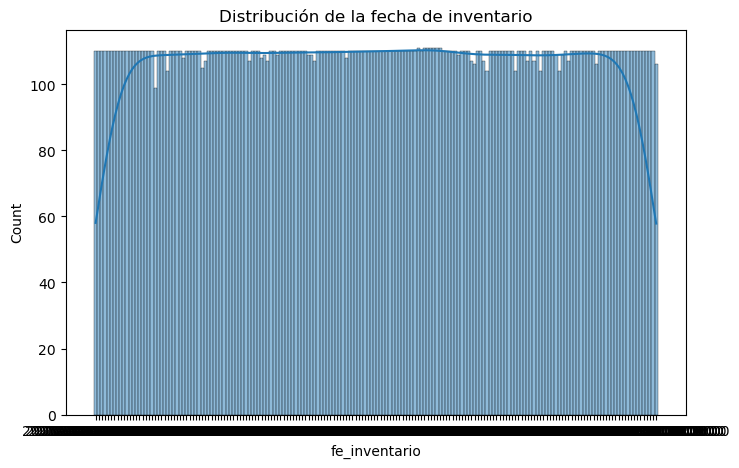

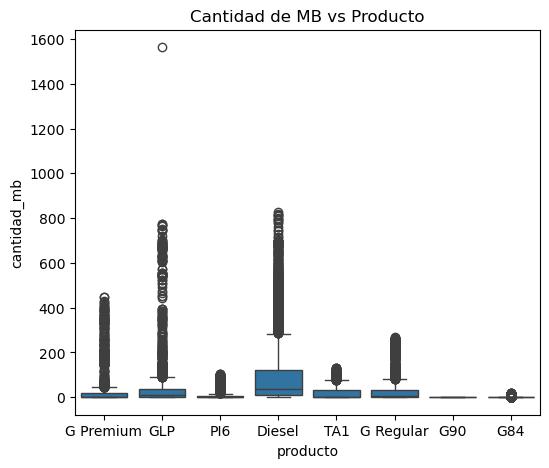

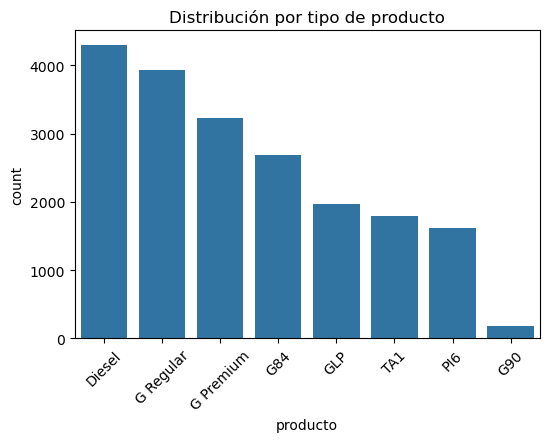

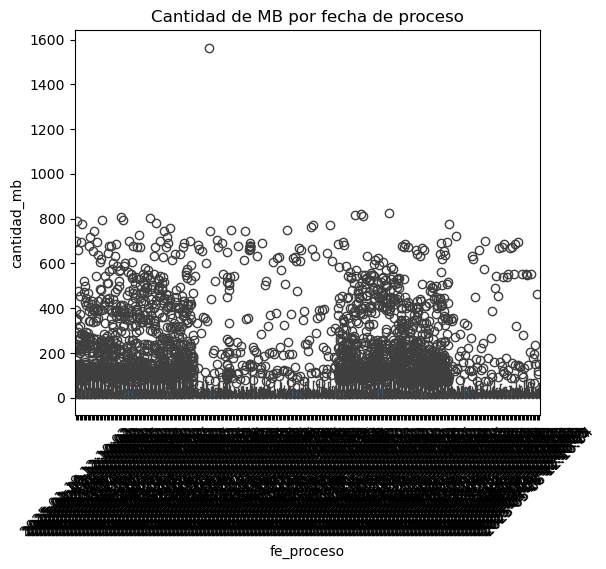

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de fechas de inventario (fe_inventario)
plt.figure(figsize=(8,5))
sns.histplot(df['fe_inventario'], bins=30, kde=True)
plt.title("Distribución de la fecha de inventario")
plt.show()

# Boxplot de cantidad de MB por tipo de producto
plt.figure(figsize=(6,5))
sns.boxplot(x='producto', y='cantidad_mb', data=df)
plt.title("Cantidad de MB vs Producto")
plt.show()

# Conteo de producto
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='producto', order=df['producto'].value_counts().index)
plt.title("Distribución por tipo de producto")
plt.xticks(rotation=45)
plt.show()

# Boxplot de cantidad de MB por proceso
plt.figure(figsize=(6,5))
sns.boxplot(x='fe_proceso', y='cantidad_mb', data=df)
plt.title("Cantidad de MB por fecha de proceso")
plt.xticks(rotation=45)
plt.show()


#### 3.3 Análisis exploratorio (con estadísticas): Correlaciones y cruces de variables

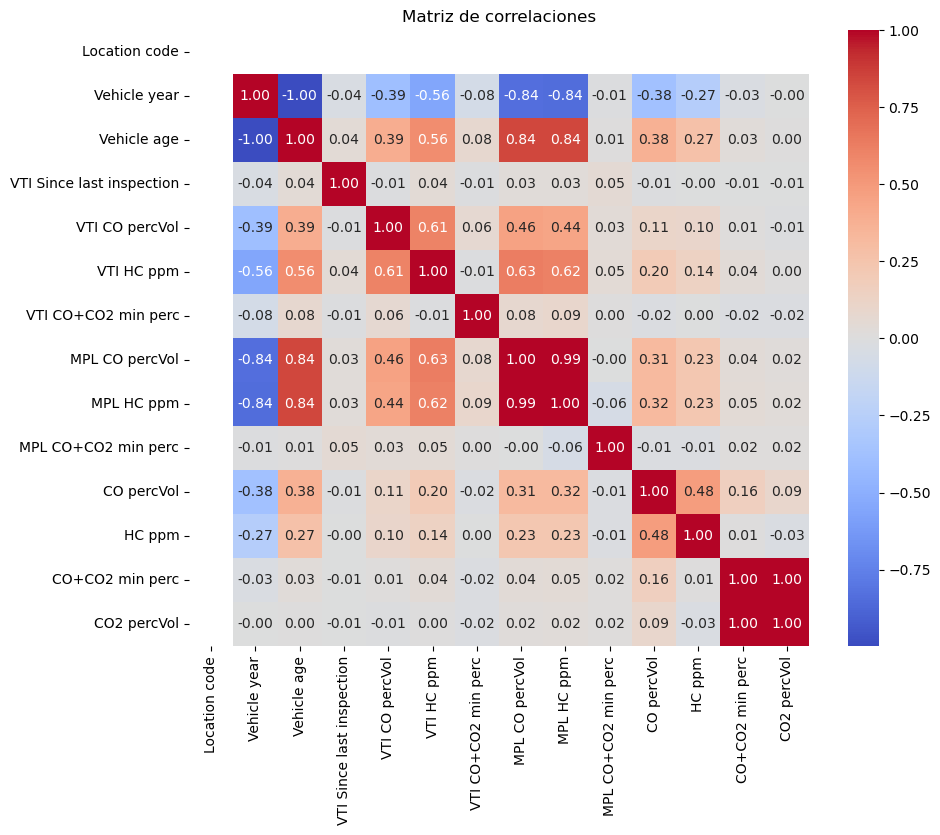

State,APPROVED,DISAPPROVED
Fuel type,,
BI-GLP,49.696970,50.303030
BI-GNV,45.924453,54.075547
DIESEL,0.000000,100.000000
GASOLINA,53.870968,46.129032
GLP,50.000000,50.000000
GNV,47.222222,52.777778


In [149]:
# Correlaciones numéricas
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaciones")
plt.show()

# Cruce de variables categóricas con el objetivo
pd.crosstab(df['Fuel type'], df['State'], normalize='index') * 100


#### 3.4 Diagnóstico de calidad inicial 

Date                           0
Place                          0
Location code                  0
Intervention type              0
Vehicle plate                  0
Vehicle type                   0
Fuel type                      0
Vehicle year                   0
Vehicle age                    0
VTI                            0
VTI Center                   619
VTI Last date                598
VTI Since last inspection    598
VTI CO percVol               606
VTI HC ppm                   604
VTI CO+CO2 min perc          605
MPL CO percVol                 0
MPL HC ppm                     0
MPL CO+CO2 min perc            0
CO percVol                     0
HC ppm                         0
CO+CO2 min perc                0
CO2 percVol                    0
State                          0
dtype: int64
Mínimo y máximo año: 1972 2017
Mínimo y máximo edad: 0 45


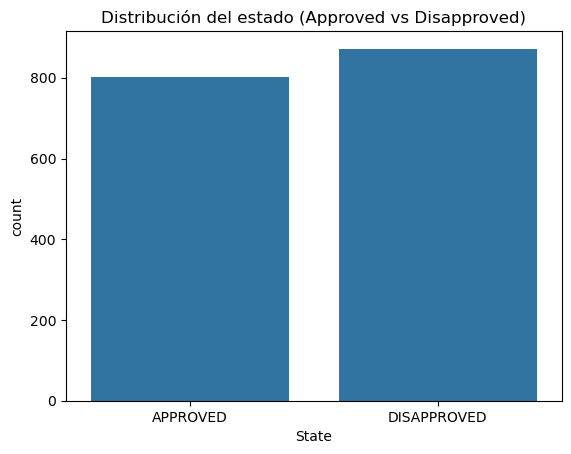

In [150]:
# Valores faltantes
print(df.isnull().sum())

# Posibles inconsistencias
print("Mínimo y máximo año:", df['Vehicle year'].min(), df['Vehicle year'].max())
print("Mínimo y máximo edad:", df['Vehicle age'].min(), df['Vehicle age'].max())

# Distribución de la variable objetivo
sns.countplot(x='State', data=df)
plt.title("Distribución del estado (Approved vs Disapproved)")
plt.show()


In [151]:
'''
Valores faltantes: identificar y cuantificar (df.isnull().sum()).
Posibles inconsistencias :
    Años fuera de rango (ej. vehículos con Vehicle year futuro).
    Edades negativas o mayores a 50 años.
Distribución de la variable objetivo (State): revisar balance entre APPROVED y DISAPPROVED.
'''
na_counts = df.isna().sum().sort_values(ascending=False)
na_pct = (na_counts/len(df)*100).round(2)
quality_missing = pd.DataFrame({'missing': na_counts, 'missing_%': na_pct})
display(quality_missing)

df['_Date_dt'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
dup_keys = df.duplicated(subset=['Vehicle plate','_Date_dt'])
print('Registros potencialmente duplicados:', dup_keys.sum())

suspects = df[(df['CO2 percVol']>25) | (df['CO percVol']>12.5) | (df['HC ppm']>5000)]
print('Registros sospechosos (CO2>25% o CO>12.5% o HC>5000):', len(suspects))
display(suspects[['Date','Vehicle plate','CO percVol','HC ppm','CO2 percVol','State']].head())


,missing,missing_%
VTI Center,619,36.98
VTI CO percVol,606,36.20
VTI CO+CO2 min perc,605,36.14
VTI HC ppm,604,36.08
VTI Since last inspection,598,35.72
VTI Last date,598,35.72
CO2 percVol,0,0.00
CO+CO2 min perc,0,0.00
HC ppm,0,0.00
CO percVol,0,0.00


Registros potencialmente duplicados: 48
Registros sospechosos (CO2>25% o CO>12.5% o HC>5000): 6


,Date,Vehicle plate,CO percVol,HC ppm,CO2 percVol,State
115,26/02/2016,D6T621,8.00,647.00,839.0,DISAPPROVED
275,20/04/2016,AAZ117,0.00,39.00,108.0,APPROVED
289,22/04/2016,F2B112,6.38,5190.00,2.9,DISAPPROVED
661,13/07/2016,F2W504,6.84,7.47,318.0,DISAPPROVED
838,11/08/2016,B9M350,0.24,8360.00,8.3,DISAPPROVED


#### 3.5 Perfil estadístico comparativo (Aprobados vs Desaprobados)

In [152]:
# Medias comparativas numéricas
df.groupby('State').mean(numeric_only=True)

,Location code,Vehicle year,Vehicle age,VTI Since last inspection,VTI CO percVol,VTI HC ppm,VTI CO+CO2 min perc,MPL CO percVol,MPL HC ppm,MPL CO+CO2 min perc,CO percVol,HC ppm,CO+CO2 min perc,CO2 percVol
State,,,,,,,,,,,,,,
APPROVED,51150131.0,2009.703242,6.482544,128.132701,0.596356,89.458759,13.579665,0.862219,138.029925,8.795511,0.136135,59.071895,12.134988,11.997943
DISAPPROVED,51150131.0,2006.763761,9.444954,125.391437,0.528974,84.031966,21.252273,0.962041,148.871330,8.855505,1.142087,324.225745,11.571021,10.441491


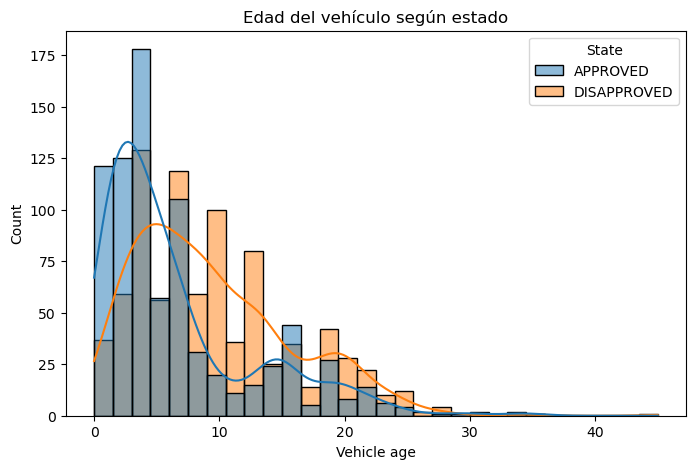

In [153]:
# Comparación gráfica de variables numéricas
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Vehicle age', hue='State', kde=True, bins=30)
plt.title("Edad del vehículo según estado")
plt.show()

In [154]:
perfil_num = df.groupby('State')[['Vehicle age','CO percVol','HC ppm','CO2 percVol']]
perfil_num = perfil_num.agg(['mean','median','std','min','max']).round(3)
display(perfil_num)

perfil_cat_fuel = pd.crosstab(df['Fuel type'], df['State'], normalize='columns')*100
perfil_cat_type = pd.crosstab(df['Vehicle type'], df['State'], normalize='columns')*100
display(perfil_cat_fuel.round(2))
display(perfil_cat_type.round(2))

perfil_num.to_csv('perfil_numerico_por_estado.csv')
perfil_cat_fuel.to_csv('perfil_combustible_por_estado.csv')
perfil_cat_type.to_csv('perfil_tipovehiculo_por_estado.csv')
print('Archivos CSV exportados.')

Vehicle age                       CO percVol                     \
                   mean median    std min max       mean median    std  min   
State                                                                         
APPROVED          6.483    4.0  6.163   0  35      0.136   0.01  0.380  0.0   
DISAPPROVED       9.445    8.0  6.321   0  45      1.142   0.15  2.008  0.0   

                     HC ppm                              CO2 percVol         \
               max     mean median      std  min     max        mean median   
State                                                                         
APPROVED      2.99   59.072   52.0   57.703  0.0   367.0      11.998   11.2   
DISAPPROVED  12.25  324.226  179.0  505.593  0.0  8360.0      10.441    9.8   

                                 
                std  min    max  
State                            
APPROVED      6.132  6.1  145.0  
DISAPPROVED  30.099  0.0  839.0

State,APPROVED,DISAPPROVED
Fuel type,,
BI-GLP,10.22,9.52
BI-GNV,57.61,62.39
DIESEL,0.00,0.11
GASOLINA,20.82,16.40
GLP,0.75,0.69
GNV,10.60,10.89


State,APPROVED,DISAPPROVED
Vehicle type,,
INDEPENDENT,44.89,59.98
PRIVATE,23.57,13.76
REMISSION,3.74,2.18
STATION,27.81,24.08


Archivos CSV exportados.


### 3.6 Hallazgos

#### Hallazgos del Paso 3: Descriptive analysis

##### 1. Distribución general del dataset
- El conjunto de datos contiene **1674 registros** y **24 variables**.  
- Hay variables categóricas (tipo de vehículo, tipo de combustible, estado de aprobación) y numéricas (año, edad, emisiones, etc.).
- Identificación administrativa:

    `Date`, `Place`, `Location code`, `Intervention type`, `Vehicle plate` → no aportan valor predictivo (son metadatos).

- Resultados de inspecciones técnicas:

    VTI, VTI Center, VTI Last date, VTI Since last inspection → dependen de inspecciones previas, podrían sesgar.

- Variables de gases contaminantes (NO USAR) porque, son post-variables (es decir, solo se conocen después de la inspección, como los gases medidos CO percVol, HC ppm), y porque el objetivo es no depender de emisiones.  

    VTI CO percVol, VTI HC ppm, VTI CO+CO2 min perc
    
    MPL CO percVol, MPL HC ppm, MPL CO+CO2 min perc
    
    CO percVol, HC ppm, CO+CO2 min perc, CO2 percVol

- Conjunto de variables finales
  
        X (predictoras) = [Vehicle type, Fuel type, Vehicle year, Vehicle age]
        y (objetivo) = [State]

##### 2. Variables categóricas principales
- **Tipo de vehículo**: aparecen varias categorías, con predominancia de autos livianos y camionetas.  
- **Tipo de combustible**: predominan vehículos a gasolina, seguidos de diésel; hay pocos registros de híbridos o gas.  
- **Estado (`State`)**:  
  - **52.1% desaprobados**  
  - **47.9% aprobados**  
  👉 La distribución está **relativamente balanceada**, lo que es positivo para el modelado.

##### 3. Variables numéricas
- **Año de vehículo**: varía entre **1972 y 2017**.  
- **Edad del vehículo**: oscila entre **0 y 45 años**.  
  - Se observan valores razonables, aunque hay presencia de autos bastante antiguos (más de 30 años).  

##### 4. Valores faltantes
- Algunas columnas presentan valores nulos, sobre todo en datos de inspecciones técnicas (`VTI`, `MPL`, etc.).  
- Esto deberá considerarse en la **fase de limpieza (Data Preparation)**.

##### 5. Correlaciones
- Existe correlación negativa esperada entre **`Vehicle year`** y **`Vehicle age`** (a mayor año, menor edad).  
- Variables de emisiones (`CO`, `HC`, `CO+CO2`) muestran correlaciones entre sí, lo cual indica redundancia.  
- La variable objetivo `State` no aparece en la matriz (es categórica), pero en el análisis comparativo se observa que **vehículos más antiguos y con mayor edad tienden a desaprobar**.

#### 6. Perfil comparativo Approved vs Disapproved
- Los **vehículos aprobados** en promedio son **más nuevos y con menor edad**.  
- En los **desaprobados** predominan autos con mayor antigüedad y más asociados a combustibles como el diésel.  
- Esto sugiere que **la edad del vehículo y el tipo de combustible son variables clave predictoras**.


## Fase 3. Data Preparation

### 🧹 4. Data cleaning

#### 4.1 Selección inicial de variables claves

Queremos construir un modelo que prediga si un vehículo será APPROVED (1) o DISAPPROVED (0) sin usar mediciones de gases contaminantes.
Por lo tanto, debemos excluir columnas de emisiones directas y quedarnos solo con las características intrínsecas del vehículo.


##### a) Candidatas a **ELIMINAR** (irrelevantes o con riesgo de *leakage*)
- **Metadatos / administrativos**:  
  `Date`, `Place`, `Location code`, `Intervention type`, `Vehicle plate`, `Vehicle year`
- **Historial de inspecciones técnicas (depende de resultados previos)**:  
  `VTI`, `VTI Center`, `VTI Last date`, `VTI Since last inspection`
- **Mediciones de emisiones (NO usar por lineamiento del proyecto)**:  
  `VTI CO percVol`, `VTI HC ppm`, `VTI CO+CO2 min perc`,  
  `MPL CO percVol`, `MPL HC ppm`, `MPL CO+CO2 min perc`,  
  `CO percVol`, `HC ppm`, `CO+CO2 min perc`, `CO2 percVol`

> *Motivo:* No aportan al objetivo de predecir aprobación usando **solo características del vehículo** y pueden introducir *data leakage*.

##### b) Candidatas a **CONSERVAR** (predictores)
- `Vehicle type`  
- `Fuel type`  
-   
- `Vehicle age`  

**Variable objetivo:** `State` (APPROVED/DISAPPROVED)

---



In [193]:
# Conservar solo variables relevantes + objetivo
features_keep = ["Vehicle type", "Fuel type", "Vehicle age"]
target = ["State"]

df_sel = df[features_keep+target]

print("df_sel.shape:", df_sel.shape)
print("df_sel.columns:", df_sel.columns.tolist())
df_sel.head(3)

df_sel.shape: (1674, 4)
df_sel.columns: ['Vehicle type', 'Fuel type', 'Vehicle age', 'State']


,Vehicle type,Fuel type,Vehicle age,State
0,INDEPENDENT,BI-GNV,1,APPROVED
1,INDEPENDENT,BI-GNV,1,APPROVED
2,STATION,BI-GNV,5,DISAPPROVED


In [194]:
# 1. Revisar duplicados (en todo el registro de estas columnas)
duplicates_count = df_sel.duplicated().sum()
# df_sel = df_sel.drop_duplicates()
duplicates_count

1253

In [195]:
# 2. Revisar outliers en Vehicle age
age_summary = df_sel['Vehicle age'].describe()
outliers_high = df_sel[df_sel['Vehicle age'] > 50].shape[0]
outliers_low = df_sel[df_sel['Vehicle age'] < 0].shape[0]
outliers_high, outliers_low


(0, 0)

In [196]:
# 3. Revisar valores faltantes
df_sel.isnull().sum()

Vehicle type    0
Fuel type       0
Vehicle age     0
State           0
dtype: int64

In [197]:
#porcentaje de valores null por columna
miss = (df_sel.isnull().sum() / len(df_sel))*100
miss.sort_values(inplace=True)
miss

Vehicle type    0.0
Fuel type       0.0
Vehicle age     0.0
State           0.0
dtype: float64

In [198]:
df_sel

,Vehicle type,Fuel type,Vehicle age,State
0,INDEPENDENT,BI-GNV,1,APPROVED
1,INDEPENDENT,BI-GNV,1,APPROVED
2,STATION,BI-GNV,5,DISAPPROVED
3,PRIVATE,BI-GNV,0,DISAPPROVED
4,INDEPENDENT,BI-GNV,1,APPROVED
...,...,...,...,...
1669,PRIVATE,GASOLINA,1,DISAPPROVED
1670,INDEPENDENT,GASOLINA,16,DISAPPROVED
1671,REMISSION,GNV,3,APPROVED
1672,INDEPENDENT,GASOLINA,25,DISAPPROVED


In [199]:
#Eliminar los valores nulos, este paso no es necesario
df_clean = df_sel.dropna()
print('df_sel.shape:',df_sel.shape)
print('df_clean.shape:',df_clean.shape)

df_sel.shape: (1674, 4)
df_clean.shape: (1674, 4)


In [200]:
# 
df_clean.describe()

,Vehicle age
count,1674.000000
mean,8.025687
std,6.416967
min,0.000000
25%,3.000000
50%,6.000000
75%,12.000000
max,45.000000


In [201]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674 entries, 0 to 1673
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Vehicle type  1674 non-null   object
 1   Fuel type     1674 non-null   object
 2   Vehicle age   1674 non-null   int64 
 3   State         1674 non-null   object
dtypes: int64(1), object(3)
memory usage: 52.4+ KB


In [202]:
#separate variables into new data frames

numeric_data = df_clean.select_dtypes(include=[np.number])
categor_data = df_clean.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],categor_data.shape[1]))

There are 1 numeric and 3 categorical columns in train data


In [203]:
numeric_data.describe()

,Vehicle age
count,1674.000000
mean,8.025687
std,6.416967
min,0.000000
25%,3.000000
50%,6.000000
75%,12.000000
max,45.000000


<Axes: >

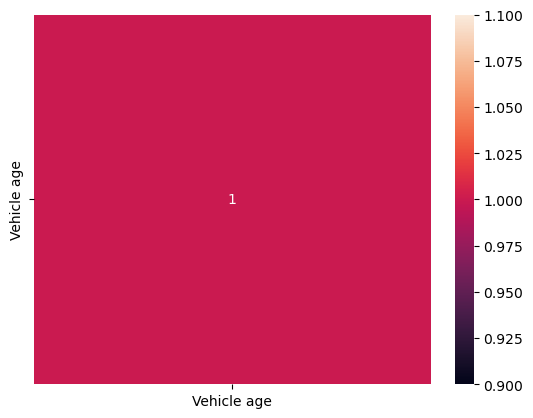

In [204]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr, annot=True)

In [205]:
categor_data.describe()

,Vehicle type,Fuel type,State
count,1674,1674,1674
unique,4,6,2
top,INDEPENDENT,BI-GNV,DISAPPROVED
freq,883,1006,872


In [206]:
print('numeric_data.columns:',numeric_data.columns)
print('categor_data.columns:',categor_data.columns)

numeric_data.columns: Index(['Vehicle age'], dtype='object')
categor_data.columns: Index(['Vehicle type', 'Fuel type', 'State'], dtype='object')


### 🧹 5. Data transformation

In [207]:
data=df_clean

In [208]:
# 1. Codificar variable objetivo con Label Encoding para codificación binaria
data['State_i'] = data['State'].map({'APPROVED': 1, 'DISAPPROVED': 0}) # Variable objetivo (binaria):
data

,Vehicle type,Fuel type,Vehicle age,State,State_i
0,INDEPENDENT,BI-GNV,1,APPROVED,1
1,INDEPENDENT,BI-GNV,1,APPROVED,1
2,STATION,BI-GNV,5,DISAPPROVED,0
3,PRIVATE,BI-GNV,0,DISAPPROVED,0
4,INDEPENDENT,BI-GNV,1,APPROVED,1
...,...,...,...,...,...
1669,PRIVATE,GASOLINA,1,DISAPPROVED,0
1670,INDEPENDENT,GASOLINA,16,DISAPPROVED,0
1671,REMISSION,GNV,3,APPROVED,1
1672,INDEPENDENT,GASOLINA,25,DISAPPROVED,0


In [209]:
# One-Hot Encoding
    # Vehicle type → columnas Type_*
    # Fuel type → columnas Fuel_*
    
data_encoded = pd.get_dummies(data, columns=['Vehicle type','Fuel type'], prefix=['Type','Fuel'])
data_encoded

,Vehicle age,State,State_i,Type_INDEPENDENT,Type_PRIVATE,Type_REMISSION,Type_STATION,Fuel_BI-GLP,Fuel_BI-GNV,Fuel_DIESEL,Fuel_GASOLINA,Fuel_GLP,Fuel_GNV
0,1,APPROVED,1,True,False,False,False,False,True,False,False,False,False
1,1,APPROVED,1,True,False,False,False,False,True,False,False,False,False
2,5,DISAPPROVED,0,False,False,False,True,False,True,False,False,False,False
3,0,DISAPPROVED,0,False,True,False,False,False,True,False,False,False,False
4,1,APPROVED,1,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,1,DISAPPROVED,0,False,True,False,False,False,False,False,True,False,False
1670,16,DISAPPROVED,0,True,False,False,False,False,False,False,True,False,False
1671,3,APPROVED,1,False,False,True,False,False,False,False,False,False,True
1672,25,DISAPPROVED,0,True,False,False,False,False,False,False,True,False,False


In [210]:
# Escalado de variable numérica (Vehicle age):
#  Podemos usar StandardScaler (media=0, sd=1) o MinMaxScaler (0–1).
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_encoded['Vehicle_age_scaled'] = scaler.fit_transform(data_encoded[['Vehicle age']])
data_encoded


,Vehicle age,State,State_i,Type_INDEPENDENT,Type_PRIVATE,Type_REMISSION,Type_STATION,Fuel_BI-GLP,Fuel_BI-GNV,Fuel_DIESEL,Fuel_GASOLINA,Fuel_GLP,Fuel_GNV,Vehicle_age_scaled
0,1,APPROVED,1,True,False,False,False,False,True,False,False,False,False,-1.095188
1,1,APPROVED,1,True,False,False,False,False,True,False,False,False,False,-1.095188
2,5,DISAPPROVED,0,False,False,False,True,False,True,False,False,False,False,-0.471654
3,0,DISAPPROVED,0,False,True,False,False,False,True,False,False,False,False,-1.251072
4,1,APPROVED,1,True,False,False,False,False,True,False,False,False,False,-1.095188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,1,DISAPPROVED,0,False,True,False,False,False,False,False,True,False,False,-1.095188
1670,16,DISAPPROVED,0,True,False,False,False,False,False,False,True,False,False,1.243063
1671,3,APPROVED,1,False,False,True,False,False,False,False,False,False,True,-0.783421
1672,25,DISAPPROVED,0,True,False,False,False,False,False,False,True,False,False,2.646014


In [211]:
# Seleccionar columnas transformadas
cols_show = ['State_i', 'Vehicle_age_scaled'] + \
             [col for col in data_encoded.columns if col.startswith('Type_') or col.startswith('Fuel_')]

data_encoded[cols_show].head()

,State_i,Vehicle_age_scaled,Type_INDEPENDENT,Type_PRIVATE,Type_REMISSION,Type_STATION,Fuel_BI-GLP,Fuel_BI-GNV,Fuel_DIESEL,Fuel_GASOLINA,Fuel_GLP,Fuel_GNV
0,1,-1.095188,True,False,False,False,False,True,False,False,False,False
1,1,-1.095188,True,False,False,False,False,True,False,False,False,False
2,0,-0.471654,False,False,False,True,False,True,False,False,False,False
3,0,-1.251072,False,True,False,False,False,True,False,False,False,False
4,1,-1.095188,True,False,False,False,False,True,False,False,False,False


In [212]:
# Seleccionar para guardar
print('features_keep:',features_keep)
print('target:',target)
# features_keep = ["Vehicle type", "Fuel type", "Vehicle age"]
# target = ["State"]

data=data[features_keep+target]
data

features_keep: ['Vehicle type', 'Fuel type', 'Vehicle age']
target: ['State']


,Vehicle type,Fuel type,Vehicle age,State
0,INDEPENDENT,BI-GNV,1,APPROVED
1,INDEPENDENT,BI-GNV,1,APPROVED
2,STATION,BI-GNV,5,DISAPPROVED
3,PRIVATE,BI-GNV,0,DISAPPROVED
4,INDEPENDENT,BI-GNV,1,APPROVED
...,...,...,...,...
1669,PRIVATE,GASOLINA,1,DISAPPROVED
1670,INDEPENDENT,GASOLINA,16,DISAPPROVED
1671,REMISSION,GNV,3,APPROVED
1672,INDEPENDENT,GASOLINA,25,DISAPPROVED


#### 🔧 Codificación y transformación de variables

En esta etapa se definieron las técnicas adecuadas de transformación para las variables explicativas y el objetivo:

##### 1. Variable objetivo: `State`
- Se aplicó **codificación binaria**:  
  - `APPROVED = 1`  
  - `DISAPPROVED = 0`  
- Justificación: el objetivo es un problema de clasificación binaria, por lo que esta representación es la más directa y eficiente.

---

##### 2. Variables categóricas: `Vehicle type` y `Fuel type`
- Se utilizó **One-Hot Encoding**, creando columnas binarias para cada categoría.  
- Justificación:  
  - Estas variables no tienen un orden intrínseco (no son ordinales).  
  - **Label Encoding** introduciría un orden artificial que puede sesgar los modelos lineales.  
  - **Ordinal Encoding** no aplica porque no existe jerarquía natural entre tipos de vehículo o combustible.  
  - **One-Hot** es más adecuado, dado que el número de categorías es pequeño y controlado, evitando explosión de dimensionalidad.

---

##### 3. Variable numérica: `Vehicle age`
- Se mantuvo la variable original y además se creó una versión **escalada con StandardScaler**.  
- Justificación:  
  - Algunos algoritmos (regresión logística, SVM, redes neuronales) se benefician del escalado.  
  - Para modelos basados en árboles (Decision Tree, Random Forest, Gradient Boosting) no es estrictamente necesario, pero no afecta negativamente.  
  - Conservar ambas versiones permite flexibilidad en la fase de modelado.

---

##### 📌 Conclusión
- **`State` → Binaria (0/1).**  
- **`Vehicle type`, `Fuel type` → One-Hot Encoding.**  
- **`Vehicle age` → Original + Escalada.**

De esta forma, todas las variables quedan listas para alimentar los modelos de Machine Learning sin introducir sesgos por codificación inapropiada.



In [213]:
# Calcular correlaciones de todas las variables numéricas con respecto a State_i
corr_vars = data_encoded.drop(columns=['State']).corr()
corr_vars


,Vehicle age,State_i,Type_INDEPENDENT,Type_PRIVATE,Type_REMISSION,Type_STATION,Fuel_BI-GLP,Fuel_BI-GNV,Fuel_DIESEL,Fuel_GASOLINA,Fuel_GLP,Fuel_GNV,Vehicle_age_scaled
Vehicle age,1.000000,-0.230693,0.265294,-0.037189,-0.096818,-0.232242,0.047723,0.016003,0.003713,-0.048415,0.009594,-0.013414,1.000000
State_i,-0.230693,1.000000,-0.150989,0.126250,0.046284,0.042472,0.011834,-0.048756,-0.023447,0.056893,0.003556,-0.004773,-0.230693
Type_INDEPENDENT,0.265294,-0.150989,1.000000,-0.502696,-0.183469,-0.624094,-0.068378,0.201231,-0.025831,-0.244944,0.009506,0.054284,0.265294
Type_PRIVATE,-0.037189,0.126250,-0.502696,1.000000,-0.082620,-0.281042,0.095786,-0.360635,0.051385,0.435147,0.032578,-0.080650,-0.037189
Type_REMISSION,-0.096818,0.046284,-0.183469,-0.082620,1.000000,-0.102572,0.002024,-0.017707,-0.004245,-0.009799,0.027252,0.031244,-0.096818
Type_STATION,-0.232242,0.042472,-0.624094,-0.281042,-0.102572,1.000000,-0.007685,0.096905,-0.014441,-0.102494,-0.050192,-0.002462,-0.232242
Fuel_BI-GLP,0.047723,0.011834,-0.068378,0.095786,0.002024,-0.007685,1.000000,-0.405796,-0.008084,-0.157642,-0.028098,-0.114778,0.047723
Fuel_BI-GNV,0.016003,-0.048756,0.201231,-0.360635,-0.017707,0.096905,-0.405796,1.000000,-0.030003,-0.585038,-0.104276,-0.425963,0.016003
Fuel_DIESEL,0.003713,-0.023447,-0.025831,0.051385,-0.004245,-0.014441,-0.008084,-0.030003,1.000000,-0.011655,-0.002077,-0.008486,0.003713
Fuel_GASOLINA,-0.048415,0.056893,-0.244944,0.435147,-0.009799,-0.102494,-0.157642,-0.585038,-0.011655,1.000000,-0.040509,-0.165476,-0.048415


In [214]:
# Ordenar las correlaciones con respecto a State_i
corr_with_target = corr_vars['State_i'].sort_values(ascending=False)

corr_with_target

State_i               1.000000
Type_PRIVATE          0.126250
Fuel_GASOLINA         0.056893
Type_REMISSION        0.046284
Type_STATION          0.042472
Fuel_BI-GLP           0.011834
Fuel_GLP              0.003556
Fuel_GNV             -0.004773
Fuel_DIESEL          -0.023447
Fuel_BI-GNV          -0.048756
Type_INDEPENDENT     -0.150989
Vehicle_age_scaled   -0.230693
Vehicle age          -0.230693
Name: State_i, dtype: float64

#### 📊 Interpretación de correlaciones

##### 1. Variables con correlación positiva (mayor probabilidad de aprobación)
- **`Type_PRIVATE` (r ≈ +0.13):** Los vehículos privados tienen más probabilidad de ser **aprobados**.  
- **`Fuel_GASOLINA` (r ≈ +0.06):** Los vehículos a gasolina tienden ligeramente a aprobar más.  
- **`Type_REMISSION` y `Type_STATION` (r ≈ +0.04):** correlaciones débiles pero positivas.

---

##### 2. Variables con correlación negativa (asociadas a desaprobación)
- **`Vehicle age` (r ≈ -0.23):** La antigüedad es la variable más fuerte: a mayor edad, más probabilidad de **desaprobar**.  
- **`Type_INDEPENDENT` (r ≈ -0.15):** Este tipo de vehículo se asocia a más desaprobación.  
- **`Fuel_BI-GNV` (r ≈ -0.05) y `Fuel_DIESEL` (r ≈ -0.02):** leve tendencia a desaprobar.

---

##### 3. Variables neutras o con efecto muy bajo
- **`Fuel_GLP`, `Fuel_GNV`, `Fuel_BI-GLP`:** correlaciones prácticamente nulas.

---

##### 📌 Conclusiones
- La **edad del vehículo** es la variable más relevante (negativa con la aprobación).  
- El **tipo de vehículo** también influye: los privados tienden a aprobar más, mientras que los independientes tienden a desaprobar.  
- El **tipo de combustible** muestra un efecto menor, aunque destaca **gasolina (+)** y **diésel (−)**.  

👉 Esto confirma que **Vehicle age + Vehicle type + Fuel type** son variables útiles para el modelo, aunque la más fuerte es claramente la **edad del vehículo**.


/tmp/ipykernel_52316/2878945897.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target_plot.values, y=corr_with_target_plot.index, palette="coolwarm")


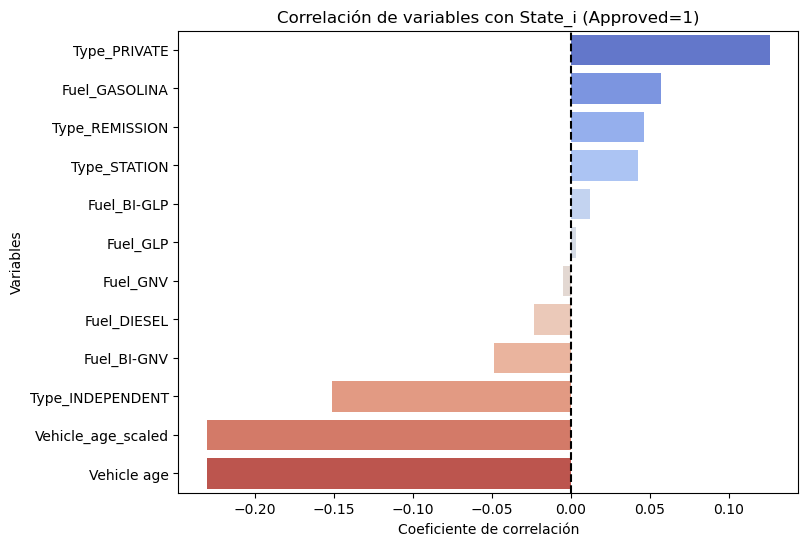

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

# Excluir la autocorrelación de State_i=1
corr_with_target_plot = corr_with_target.drop('State_i')

# Crear gráfico de barras ordenado
plt.figure(figsize=(8,6))
sns.barplot(x=corr_with_target_plot.values, y=corr_with_target_plot.index, palette="coolwarm")
plt.title("Correlación de variables con State_i (Approved=1)")
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Variables")
plt.axvline(0, color='black', linestyle='--')
plt.show()


In [ ]:
# fin del cuaderno ----*-----

#### Otras posibles transformaciones
- Agrupar años de vehículo en rangos (ej. <2000, 2000–2010, >2010).  
- Variables binarias: ¿tiene revisión técnica vigente?  
- Crear indicadores basados en límites MPL vs. medición real. 

#### Reduccion.
Aquí buscamos quedarnos con las variables más útiles, eliminando redundantes o irrelevantes, para que el modelo sea eficiente y evite ruido.

In [216]:
data

,Vehicle type,Fuel type,Vehicle age,State
0,INDEPENDENT,BI-GNV,1,APPROVED
1,INDEPENDENT,BI-GNV,1,APPROVED
2,STATION,BI-GNV,5,DISAPPROVED
3,PRIVATE,BI-GNV,0,DISAPPROVED
4,INDEPENDENT,BI-GNV,1,APPROVED
...,...,...,...,...
1669,PRIVATE,GASOLINA,1,DISAPPROVED
1670,INDEPENDENT,GASOLINA,16,DISAPPROVED
1671,REMISSION,GNV,3,APPROVED
1672,INDEPENDENT,GASOLINA,25,DISAPPROVED


In [217]:
# Frecuencias categóricas
freq_vehicle_type = data['Vehicle type'].value_counts(normalize=True) * 100
freq_vehicle_type.to_frame("percentage")


,percentage
Vehicle type,
INDEPENDENT,52.747909
STATION,25.866189
PRIVATE,18.458781
REMISSION,2.927121


In [218]:
freq_fuel_type = data['Fuel type'].value_counts(normalize=True) * 100
freq_fuel_type.to_frame("percentage")

,percentage
Fuel type,
BI-GNV,60.095579
GASOLINA,18.518519
GNV,10.752688
BI-GLP,9.856631
GLP,0.716846
DIESEL,0.059737


In [221]:
# Guardar dataset limpio sin transformar, revisar lo que conviene
data.to_csv("data_clean.csv", index=False)
print("Dataset limpio guardado como data_clean.csv")

data_encoded.to_csv("data_encoded_clean.csv", index=False)
print("Dataset limpio + transformado guardado como data_encoded_clean.csv")


Dataset limpio guardado como data_clean.csv
Dataset limpio + transformado guardado como data_encoded_clean.csv


### ✅  6. Data validation (Sesión 4)

Aquí buscamos quedarnos con las variables más útiles, eliminando redundantes o irrelevantes, para que el modelo sea eficiente y evite ruido.

In [220]:
df = pd.read_csv("data_clean.csv")
df.head()

,Vehicle type,Fuel type,Vehicle age,State
0,INDEPENDENT,BI-GNV,1,APPROVED
1,INDEPENDENT,BI-GNV,1,APPROVED
2,STATION,BI-GNV,5,DISAPPROVED
3,PRIVATE,BI-GNV,0,DISAPPROVED
4,INDEPENDENT,BI-GNV,1,APPROVED


In [222]:
data_encoded = pd.read_csv("data_encoded_clean.csv")
data_encoded.head()

,Vehicle age,State,State_i,Type_INDEPENDENT,Type_PRIVATE,Type_REMISSION,Type_STATION,Fuel_BI-GLP,Fuel_BI-GNV,Fuel_DIESEL,Fuel_GASOLINA,Fuel_GLP,Fuel_GNV,Vehicle_age_scaled
0,1,APPROVED,1,True,False,False,False,False,True,False,False,False,False,-1.095188
1,1,APPROVED,1,True,False,False,False,False,True,False,False,False,False,-1.095188
2,5,DISAPPROVED,0,False,False,False,True,False,True,False,False,False,False,-0.471654
3,0,DISAPPROVED,0,False,True,False,False,False,True,False,False,False,False,-1.251072
4,1,APPROVED,1,True,False,False,False,False,True,False,False,False,False,-1.095188


In [223]:
# Seleccionar columnas transformadas
cols_show = ['State_i', 'Vehicle_age_scaled'] + \
             [col for col in data_encoded.columns if col.startswith('Type_') or col.startswith('Fuel_')]

data_encoded[cols_show].head()

,State_i,Vehicle_age_scaled,Type_INDEPENDENT,Type_PRIVATE,Type_REMISSION,Type_STATION,Fuel_BI-GLP,Fuel_BI-GNV,Fuel_DIESEL,Fuel_GASOLINA,Fuel_GLP,Fuel_GNV
0,1,-1.095188,True,False,False,False,False,True,False,False,False,False
1,1,-1.095188,True,False,False,False,False,True,False,False,False,False
2,0,-0.471654,False,False,False,True,False,True,False,False,False,False
3,0,-1.251072,False,True,False,False,False,True,False,False,False,False
4,1,-1.095188,True,False,False,False,False,True,False,False,False,False


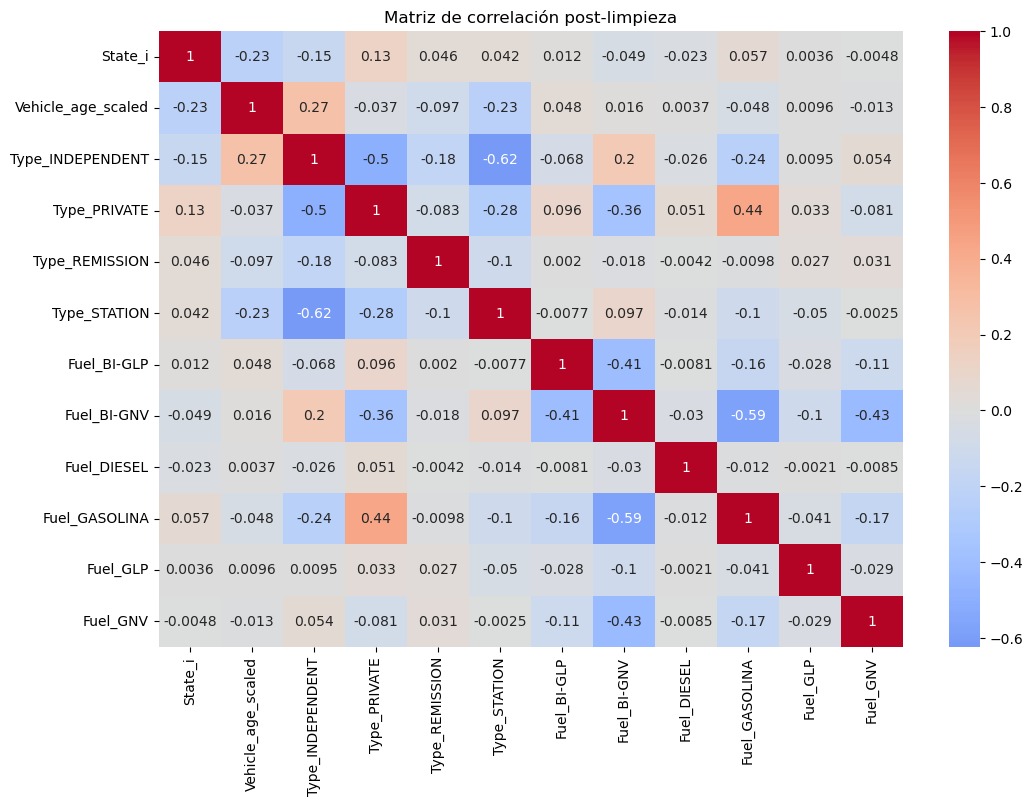

In [230]:
import seaborn as sns, matplotlib.pyplot as plt
corr = data_encoded[cols_show].corr()
plt.figure(figsize=(12,8))

sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación post-limpieza")

plt.show()


In [238]:
corr["State_i"].sort_values(ascending=False)


State_i               1.000000
Type_PRIVATE          0.126250
Fuel_GASOLINA         0.056893
Type_REMISSION        0.046284
Type_STATION          0.042472
Fuel_BI-GLP           0.011834
Fuel_GLP              0.003556
Fuel_GNV             -0.004773
Fuel_DIESEL          -0.023447
Fuel_BI-GNV          -0.048756
Type_INDEPENDENT     -0.150989
Vehicle_age_scaled   -0.230693
Name: State_i, dtype: float64

#####  Selección final de variables

In [239]:
# Ejemplo: eliminar variables con baja correlación con el target (<0.05) o redundantes (>0.9 entre sí)
data_f=data_encoded
to_drop = [col for col in data_f[cols_show].columns if col not in ["State_i"] and abs(data_f[col].corr(data_f["State_i"])) < 0.05]
df_final = data_f[cols_show].drop(columns=to_drop)

print("Variables eliminadas:", to_drop)
print("Dimensiones finales:", df_final.shape)

Variables eliminadas: ['Type_REMISSION', 'Type_STATION', 'Fuel_BI-GLP', 'Fuel_BI-GNV', 'Fuel_DIESEL', 'Fuel_GLP', 'Fuel_GNV']
Dimensiones finales: (1674, 5)


In [240]:
df_final

,State_i,Vehicle_age_scaled,Type_INDEPENDENT,Type_PRIVATE,Fuel_GASOLINA
0,1,-1.095188,True,False,False
1,1,-1.095188,True,False,False
2,0,-0.471654,False,False,False
3,0,-1.251072,False,True,False
4,1,-1.095188,True,False,False
...,...,...,...,...,...
1669,0,-1.095188,False,True,True
1670,0,1.243063,True,False,True
1671,1,-0.783421,False,False,False
1672,0,2.646014,True,False,True


In [ ]:
df_final.to_csv("data_encoded_clean_final.csv", index=False)
print("Dataset limpio + transformado guardado como data_encoded_clean_final.csv")

### Guía autónoma de la sesión 4

cada equipo aplica exactamente el mismo flujo a su dataset del proyecto grupal.

#### 📦 Entregables Sesión 4
1. Este notebook o cuaderno .ipynb pero con tus datos.
2. Dataset limpio + transformado en .csv.
3. Github:https://github.com/mindatos/respiralimpio (reemplaza aquí por tu url)
4. Coloca aquí el resumen de decisiones.
